In [1]:
import sys
from RF_class import RF_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from glob import glob

model = RF_model()

In [2]:
# hyper_params = {}
# hyper_params['n_estimators'] = [20, 51, 82, 113, 144, 175, 206, 237, 268, 300]
# hyper_params['max_features'] = ['sqrt', 'log2']
# hyper_params['max_depth'] = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# hyper_params['min_samples_split'] = [2, 5, 10]
# hyper_params['min_samples_leaf'] = [1, 2, 4]

hyper_params = {'rf__n_estimators': [100],
                'rf__max_features': ['sqrt'],
                'rf__max_depth':  [10, 20, 50],
                'rf__min_samples_split': [2, 3, 5],
                'rf__min_samples_leaf': [3, 4, 5]}

In [3]:
training_path = '/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/training_data/'
targs_df = pd.read_csv(training_path+'dock/ChEMBL_docking_df.csv', index_col='ID')
targs = targs_df['CNN_affinity']
targs
feats_df = pd.read_csv(training_path+'desc/rdkit/ChEMBL_rdkit_desc_1.csv.gz', index_col='ID', compression='gzip')
save_path='/users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0'

In [4]:
same_value_columns = feats_df.columns[~feats_df.apply(lambda col: col.nunique() == 1)]
df = feats_df[same_value_columns]
df
    

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_piperdine,fr_piperzine,fr_priamide,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_thiazole,fr_unbrch_alkane,fr_urea
ID,,,,,,,,,,,,,,,,,,,,,
CHEMBL3979343,13.317538,13.317538,0.122687,-3.774721,0.484645,15.871795,547.641,518.409,547.200173,202,...,0,1,0,0,0,1,0,0,0,0
CHEMBL4089152,12.843618,12.843618,0.076179,-0.499940,0.476300,14.857143,378.432,356.256,378.169191,144,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4084046,12.034401,12.034401,0.150556,-0.720045,0.726994,11.000000,335.230,319.102,334.052735,114,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4069010,12.711747,12.711747,0.043889,-0.717034,0.738587,12.217391,308.313,294.201,308.092832,116,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4071717,11.938057,11.938057,0.063368,-0.304020,0.805570,10.166667,411.683,395.555,410.003282,126,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL4069308,12.546179,12.546179,0.037344,0.037344,0.730899,14.727273,310.422,292.278,310.113984,112,...,0,0,0,0,0,0,0,0,0,0
CHEMBL1507539,12.532657,12.532657,0.200561,-0.468584,0.916147,23.565217,316.357,296.197,316.142307,122,...,0,0,0,0,0,0,0,0,0,0
CHEMBL188678,12.914883,12.914883,0.011012,-0.011012,0.374251,14.733333,413.498,394.346,413.108564,148,...,0,0,0,0,0,0,0,0,0,0


Performing resample 5
Performing resample 9
Performing resample 7
Performing resample 31
Performing resample 11
Performing resample 43
Performing resample 45
Performing resample 21
Performing resample 17
Performing resample 27
Performing resample 19
Performing resample 25
Performing resample 23
Performing resample 41
Performing resample 29
Performing resample 49
Performing resample 33
Performing resample 1
Performing resample 13
Performing resample 37
Performing resample 39
Performing resample 15
Performing resample 35
Performing resample 47
Performing resample 3


/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature name

Performing resample 50
Performing resample 36
Performing resample 16


/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),


Performing resample 34
Performing resample 44


/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),


Performing resample 42


/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature name

Performing resample 10


/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature name

Performing resample 4


/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The under

Performing resample 30
Performing resample 26
Performing resample 40
Performing resample 20


/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),


Performing resample 18
Performing resample 38
Performing resample 46
Performing resample 32
Performing resample 22
Performing resample 12
Performing resample 48


/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature name

Performing resample 2
Performing resample 6
Performing resample 28
Performing resample 8
Performing resample 14


/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),


Performing resample 24


/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py:300: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  tar_tr.ravel(),
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature name

Plotting feature importance
Saving final model to:
/users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0/final_model.pkl


(RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=3),
 {'rf__max_depth': 50,
  'rf__max_features': 'sqrt',
  'rf__min_samples_leaf': 3,
  'rf__min_samples_split': 2,
  'rf__n_estimators': 100},
 {'Bias': -0.6943,
  'SDEP': 0.624,
  'MSE': 0.8827,
  'RMSE': 0.9366,
  'r2': -1.0617},
                     Feature  Importance
 77               SlogP_VSA4    0.047896
 30                    Chi0n    0.034239
 122               RingCount    0.032505
 32                     Chi1    0.030612
 28                  BertzCT    0.030553
 ..                      ...         ...
 156                fr_azide    0.000000
 183                fr_nitro    0.000000
 184           fr_nitro_arom    0.000000
 185  fr_nitro_arom_nonortho    0.000000
 175          fr_isothiocyan    0.000000
 
 [210 rows x 2 columns],
 (-0.07955763149981598,
  -0.07960891757972181,
  -0.08606432796317372,
  -0.07202272757530011,
  -0.08286560695331799,
  -0.08370625059580919,
  -0.0761204504819876,
  -0.0

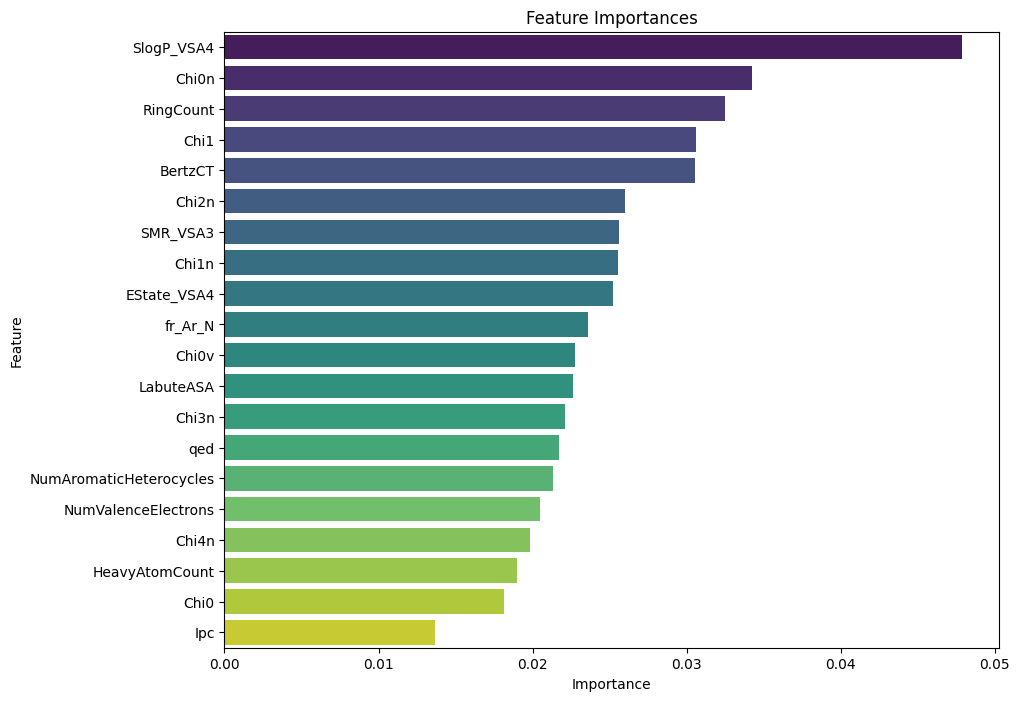

In [5]:
model.Train_Regressor(search_type='grid',
                      hyper_params=hyper_params,
                      features=feats_df,
                      targets=targs,
                      save_path=save_path,
                      save_final_model=True,
                      plot_feat_importance=True)

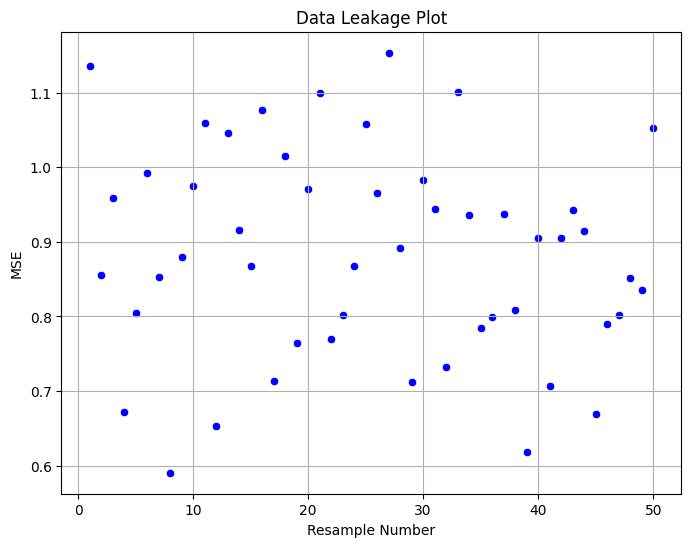

Mean cross_val_score: -0.08121903795251692
Standard Deviation cross_val_score: 0.004001912213587483


In [6]:
model.AnalyseModel()

In [ ]:
feat_csv = "~/Recreating_DMTA/datasets/test_data/PMG_rdkit_desc_1.csv"
feat_df = pd.read_csv(feat_csv).set_index('ID').drop(columns=['SPS.1'])
full_csv = "~/Recreating_DMTA/datasets/test_data/PMG_rdkit_1.csv"
final_rf_path = "/users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0/final_model.pkl"

In [ ]:
preds = model.Predict(feats=feat_df, save_preds=True, preds_save_path="~/Recreating_DMTA/datasets/test_data/", preds_filename="all_preds_1", final_rf=final_rf_path, full_data_fpath=full_csv)

/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/en

In [ ]:
preds.to_csv('/users/yhb18174/Recreating_DMTA/results/test/test_1/it0/all_preds.csv.gz', compression='gzip', index='ID')

In [62]:
import statistics
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    RandomizedSearchCV,
    train_test_split,
)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib
from joblib import Parallel, delayed
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
from tqdm import tqdm
import json
import math
import time


In [129]:
def fit_model_and_evaluate(
    n: int,
    features: pd.DataFrame,
    targets: pd.DataFrame,
    test_size: float,
    save_interval_models: bool,
    save_path: str,
    hyper_params: dict,
    inner_cv_type: str,
    n_splits: int,
    search_type: str,
    scoring: str,
    n_resamples: int
):

    rng = rand.randint(0, 2**31)
    #print(f"Performing resample {n + 1}")
    resample_number = n + 1

    # Train/test split
    feat_tr, feat_te, tar_tr, tar_te = train_test_split(
        features, targets, test_size=test_size, random_state=rng
    )

    # Convert DataFrames to NumPy arrays if necessary
    tar_tr = tar_tr.values.ravel() if isinstance(tar_tr, pd.DataFrame) else tar_tr
    tar_te = tar_te.values.ravel() if isinstance(tar_te, pd.DataFrame) else tar_te

    # Reinitialize the model and cross-validation
    rf = Pipeline([('scaler', StandardScaler()),('rf', RandomForestRegressor())])
    inner_cv = _set_inner_cv(cv_type=inner_cv_type, n_splits=n_splits)

    if search_type == "grid":
        search = GridSearchCV(
            estimator=rf,
            param_grid=hyper_params,
            cv=inner_cv,
            scoring=scoring,
        )

    search.fit(feat_tr, tar_tr)

    best_pipeline = search.best_estimator_
    best_rf = best_pipeline.named_steps['rf']

    # Calculate performance
    performance = _calculate_performance(
        target_test=tar_te, feature_test=feat_te, best_rf=best_rf
    )

    cross_val_scores = cross_val_score(search.best_estimator_,
                                    feat_tr,
                                    tar_tr,
                                    cv=inner_cv,
                                    scoring=scoring)

    true_ls = performance[5]
    pred_ls = performance[6]
    feats = performance[7]
    performance = performance[:-2]

    if save_interval_models:
        joblib.dump(best_rf, f"{save_path}{n}.pkl")

    return search.best_params_, performance, best_rf.feature_importances_, resample_number, true_ls, pred_ls, feat_tr, feat_te, tar_tr, tar_te, np.mean(cross_val_scores)

In [105]:
def _calculate_performance(
    feature_test: pd.DataFrame, target_test: pd.DataFrame, best_rf: object
):
    global true_ls, pred_ls

    # Get predictions from the best model in each resample
    predictions = best_rf.predict(feature_test)

    # Calculate Errors
    true = target_test.astype(float)
    pred = predictions.astype(float)
    errors = true - pred


    # Calculate performance metrics
    bias = np.mean(errors)
    sdep = (np.mean((true-pred-(np.mean(true-pred)))**2))**0.5
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)

    return bias, sdep, mse, rmse, r2, true, pred, feature_test

In [8]:
def _set_inner_cv(cv_type: str = "kfold", n_splits: int = 5):
        rng = rand.randint(0, 2**31)

        if cv_type == "kfold":
            inner_cv = KFold(n_splits=n_splits, shuffle=True, random_state=rng)

        return inner_cv

In [71]:
def train_regressor(
    search_type: str,
    scoring: str = 'neg_mean_squared_error',
    n_resamples: int = 50,
    inner_cv_type: str = "kfold",
    n_splits: int = 5,
    test_size: float = 0.3,
    hyper_params: dict = None,
    features: pd.DataFrame = None,
    targets: pd.DataFrame = None,
    save_interval_models: bool = False,
    save_path: str = None,
    save_final_model: bool = False,
    plot_feat_importance: bool = False,
    batch_size: int = 2
):

    def process_batch(batch_indices):
        results_batch = []
        for n in batch_indices:
            result = fit_model_and_evaluate(
                n, features, targets, test_size, save_interval_models, save_path, 
                hyper_params, inner_cv_type, n_splits, search_type, scoring, n_resamples
            )
            results_batch.append(result)
        return results_batch

    n_batches = (n_resamples + batch_size - 1) // batch_size
    batches = [range(i * batch_size, min((i + 1) * batch_size, n_resamples)) for i in range(n_batches)]
    results_batches = Parallel(n_jobs=-1)(delayed(process_batch)(batch) for batch in batches)
    results = [result for batch in results_batches for result in batch]

    best_params_ls, performance_list, feat_importance_ls, resample_number_ls, true_ls, preds_ls, feat_tr, feat_te, tar_tr, tar_te, cv_score=  zip(*results)

    best_params_df = pd.DataFrame(best_params_ls)
    best_params = best_params_df.mode().iloc[0].to_dict()
    for key, value in best_params.items():
        if key != "rf__max_features":
            best_params[key] = int(value)

    performance_dict = {
        "Bias": round(float(np.mean([perf[0] for perf in performance_list])), 4),
        "SDEP": round(float(np.mean([perf[1] for perf in performance_list])), 4),
        "MSE": round(float(np.mean([perf[2] for perf in performance_list])), 4),
        "RMSE": round(float(np.mean([perf[3] for perf in performance_list])), 4),
        "r2": round(float(np.mean([perf[4] for perf in performance_list])), 4),
    }

    avg_feat_importance = np.mean(feat_importance_ls, axis=0)
    feat_importance_df = pd.DataFrame(
        {"Feature": features.columns.tolist(), "Importance": avg_feat_importance}
    ).sort_values(by="Importance", ascending=False)

    cleaned_best_params = {key.split('__')[1]: value for key, value in best_params.items()}
    final_rf = RandomForestRegressor(**cleaned_best_params)

    final_rf.fit(features, targets.to_numpy())

    return final_rf, best_params, performance_dict, feat_importance_df, true_ls, preds_ls, feat_tr, feat_te, tar_tr, tar_te, cv_score

In [124]:
final_rf, best_params, performance_dict, feat_importance_df, true_ls, pred_ls,  feat_tr, feat_te, tar_tr, tar_te, cv_score=train_regressor(search_type='grid',
                      hyper_params=hyper_params,
                      features=feats_df,
                      targets=targs,
                      save_path=save_path,
                      save_final_model=True,
                      plot_feat_importance=True)

/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/en

In [9]:
np.std(cv_score)


NameError: name 'cv_score' is not defined

In [127]:
np.mean(cv_score)

-0.08082725072349942

In [101]:
combined_pred = np.concatenate(pred_ls, axis=0)
combined_true = np.concatenate(pred_ls, axis=0)

In [118]:
error = true_ls[0] - pred_ls[0]

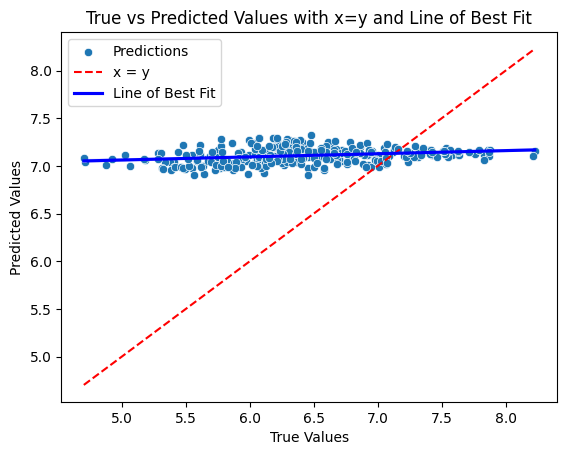

In [128]:
n = 3
sns.scatterplot(x=true_ls[n], y=pred_ls[n], label="Predictions")

# Add the x = y line
plt.plot([min(true_ls[n]), max(true_ls[n])], [min(true_ls[n]), max(true_ls[n])], 
         color='red', linestyle='--', label="x = y")

# Add the line of best fit
sns.regplot(x=true_ls[n], y=pred_ls[n], scatter=False, color='blue', label="Line of Best Fit")

# Add labels and title for clarity
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values with x=y and Line of Best Fit")
plt.legend()


In [43]:
for tr, te in zip(feat_tr, feat_te):
    for ids in tr.index:
        if ids in te.index:
            print('feat overlap')

for tr, te in zip(tar_tr, tar_te):
    for ids in tr.index:
        if ids in te.index:
            print('tar overlap')